In [278]:
from ipywidgets import interact

In [279]:
def quad(a,b,c,x): return a*x**2 + b*x + c

quad(3,2,1, 1.5)

10.75

In [280]:
from functools import partial
def mk_quad(a,b,c): return partial(quad, a,b,c)

In [281]:
f = mk_quad(3,2,1)
f(1.5)

10.75

In [282]:
from numpy.random import normal, seed, uniform

seed(42)

def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x, add)

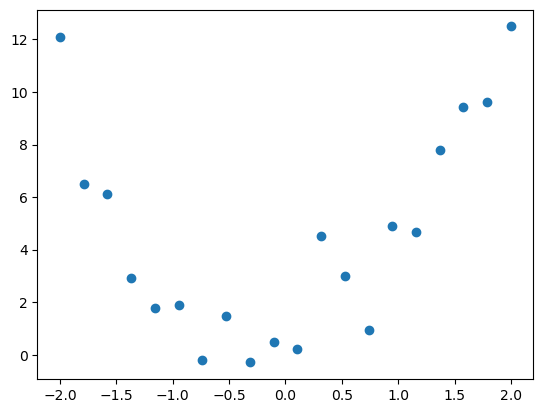

In [283]:
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.2, 1.5)

plt.scatter(x, y)
plt.show()

In [284]:
def mse(preds, acts): return ((preds - acts)**2).mean()

In [285]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
  f = mk_quad(a,b,c)
  plt.scatter(x, y)
  loss = mse(f(x), y)
  plt.plot(x, f(x), 'r')
  plt.ylim(-3, 12)
  plt.title(f'MSE: {loss: .2f}')
  plt.show()

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [286]:
def quad_mse(params):
  f = mk_quad(*params)
  return mse(f(x), y)

In [287]:
quad_mse([1.5, 1.5, 1.5])

tensor(5.3313, dtype=torch.float64)

In [288]:
# rank 1 tensor
abc = torch.tensor([1.5, 1.5, 1.5], requires_grad=True)
abc

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [289]:
loss = quad_mse(abc)
loss

tensor(5.3313, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [290]:
loss.backward()

In [291]:
abc.grad

tensor([-6.4412,  1.6558, -1.6083])

In [292]:
# abc requires_grad, with torch.no_grad signals we don't want to calculate
# gradient in the following operations
with torch.no_grad():
  abc -= abc.grad*0.01
  loss = quad_mse(abc)
  
print(f'loss={loss:.2f}')

loss=4.88


In [293]:
for i in range(5):
  loss = quad_mse(abc)
  loss.backward()
  with torch.no_grad(): abc -= abc.grad*0.095
  print(f'step={i}; loss={loss:.2f}')

step=0; loss=4.88
step=1; loss=3.64
step=2; loss=9.35
step=3; loss=6.05
step=4; loss=2.72


In [294]:
abc

tensor([ 1.6970,  0.2457, -0.1065], requires_grad=True)

In [295]:
def rectified_linear(m,b,x):
  y = m*x + b
  return torch.clip(y, 0.)

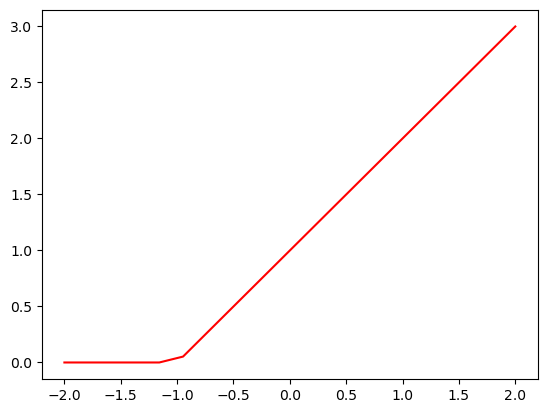

In [296]:
relu = partial(rectified_linear, 1, 1)
plt.plot(x, relu(x), 'r')
plt.show()

In [297]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
  relu = partial(rectified_linear, m, b)
  plt.plot(x, relu(x), 'r')
  plt.show()

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [298]:
def double_relu(m1, b1, m2, b2, x):
  return rectified_linear(m1, b1, x) + rectified_linear(m2, b2, x)

In [299]:
@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
  f = partial(double_relu, m1, b1, m2, b2)
  plt.plot(x, f(x), 'r')
  plt.show()

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…